In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
from FinMind.data import DataLoader
api = DataLoader()

In [6]:
today = datetime.today() #datetime.strptime('2025-04-30', "%Y-%m-%d")
start_date = (today - relativedelta(years=3)).strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")
print('start date', start_date)
print('end date', end_date)

start date 2022-09-04
end date 2025-09-04


In [7]:
ticker = '9958'
df = api.taiwan_stock_daily(
    stock_id=ticker,
    start_date=start_date,
    end_date=end_date
)
df_margin = api.taiwan_stock_margin_purchase_short_sale(
    stock_id=ticker,
    start_date=start_date,
    end_date=end_date,
)
df_investor = api.taiwan_stock_institutional_investors(
            stock_id=ticker,
            start_date=start_date,
            end_date=end_date
        )
df_investor['value'] = df_investor['buy'] - df_investor['sell']
df_investor = df_investor.pivot_table(index='date', columns='name', values='value')
df_investor = df_investor.reset_index()

2025-09-04 09:47:26.540 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockPrice, data_id: 9958
2025-09-04 09:47:27.557 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockMarginPurchaseShortSale, data_id: 9958
2025-09-04 09:47:28.611 | INFO     | FinMind.data.finmind_api:get_data:158 - download Dataset.TaiwanStockInstitutionalInvestorsBuySell, data_id: 9958


In [ ]:
df = pd.merge(df, df_margin, on='date', how='left')
df = pd.merge(df, df_investor, on='date', how='left')
df = df.sort_index(ascending=False)
df

,date,stock_id_x,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover,...,ShortSaleCashRepayment,ShortSaleLimit,ShortSaleSell,ShortSaleTodayBalance,ShortSaleYesterdayBalance,Dealer_Hedging,Dealer_self,Foreign_Dealer_Self,Foreign_Investor,Investment_Trust
0,2022-09-05,9958,1182471,99107703,84.5,85.0,83.0,83.0,-1.6,1102,...,0,58099,67,345,324,-28000.0,4272.0,0.0,-68000.0,0.0
1,2022-09-06,9958,1525642,125453148,83.3,83.5,81.5,82.0,-1.0,1378,...,0,58099,76,377,345,-4000.0,-641.0,0.0,291000.0,0.0
2,2022-09-07,9958,2099285,169966931,82.4,82.8,80.3,80.5,-1.5,1759,...,0,58099,11,324,377,-24000.0,-7855.0,0.0,68000.0,0.0
3,2022-09-08,9958,1305456,108082940,81.4,83.4,81.4,83.2,2.7,1044,...,0,58099,17,314,324,49000.0,-3225.0,0.0,565000.0,0.0
4,2022-09-12,9958,2418493,199164751,82.7,83.9,80.7,83.7,0.5,1763,...,0,58099,39,308,314,24866.0,1000.0,0.0,311000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2025-08-28,9958,1598643,302634029,191.5,192.0,187.5,188.0,-4.5,1939,...,0,64224,3,132,141,-261551.0,-9774.0,0.0,-178460.0,-3000.0
723,2025-08-29,9958,4036605,744187177,190.0,190.0,182.0,183.5,-4.5,4036,...,0,64224,7,96,132,-92424.0,-76087.0,0.0,-794978.0,-5000.0
724,2025-09-01,9958,3488965,624650614,183.5,185.0,175.0,178.0,-5.5,3834,...,0,64224,27,112,96,-225219.0,-432870.0,0.0,499400.0,-63000.0
725,2025-09-02,9958,2021527,357048669,178.5,179.5,175.0,176.0,-2.0,2096,...,0,64224,9,103,112,-24098.0,-54828.0,0.0,-3000.0,-63000.0


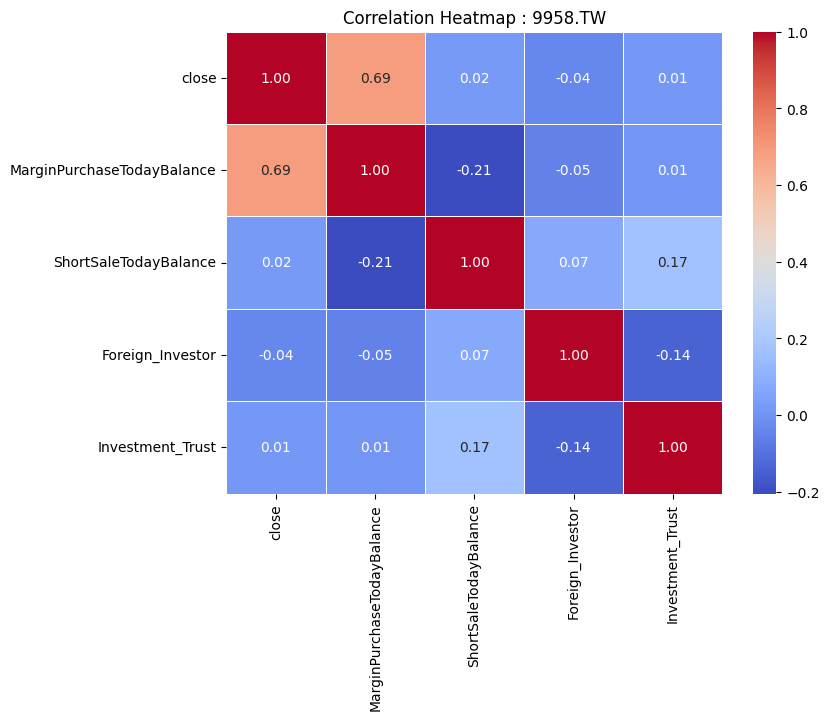

In [10]:
correlation_matrix = df[['close', 'MarginPurchaseTodayBalance', 'ShortSaleTodayBalance', 'Foreign_Investor', 'Investment_Trust',]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Heatmap : {ticker}.TW')
plt.show()